In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.utils import check_array, safe_indexing, sparsefuncs_fast, check_X_y, check_random_state
from sklearn.preprocessing import OneHotEncoder
from scipy import sparse
from sklearn.neighbors import NearestNeighbors
from sklearn.base import clone
from numbers import Integral
from sklearn.svm import SVC
from collections import Counter
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, SMOTENC, SVMSMOTE
import os
# import missingpy as missingpy
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
import pickle
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score, roc_auc_score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, roc_curve

# Set folder paths for outputs

In [2]:
os.chdir('C:/Users/HCJ/Desktop/2021_Summer/Finance_data/sampling/SMOTE-ENC-code-master')
REPO_ROOT = Path(os.getcwd())
DATA = Path(REPO_ROOT / 'data')
MODELS = Path(REPO_ROOT / 'model')
REPORTS = Path(REPO_ROOT / 'reports' / 'car')

# Read the file

In [3]:
bank= pd.read_csv(DATA / 'bank.csv')
df = bank.drop(['Unnamed: 0','J_CORE_DPS_1M_AVBL_AM_RE',
       'J_CORE_DPS_6M_AVBL_AM_RE', 'J_TOT_DPS_ACC_CNT_RE',
       'J_NRML_DPS_ACC_CNT_RE', 'J_TOT_SAVING_ACC_CNT_RE',
       'J_NRML_SAVING_ACC_CNT_RE', 'J_TOT_TS_1M_CNT_RE', 'J_TOT_TS_6M_CNT_RE',
       'J_TOT_TS_1M_AM_RE', 'J_TOT_TS_6M_AM_RE', 'J_OB_TS_1M_CNT_RE',
       'J_OB_TS_6M_CNT_RE', 'J_OB_TS_1M_AM_RE', 'J_OB_TS_6M_AM_RE',
       'J_IB_TS_1M_CNT_RE', 'J_IB_TS_6M_CNT_RE', 'J_IB_TS_1M_AM_RE',
       'J_IB_TS_6M_AM_RE', 'J_TOT_TS_3M_AVG_CNT_RE', 'J_TOT_TS_6M_AVG_CNT_RE',
       'J_TOT_TS_3M_AVG_AM_RE', 'J_TOT_TS_6M_AVG_AM_RE',
       'J_OB_TS_3M_AVG_CNT_RE', 'J_OB_TS_6M_AVG_CNT_RE',
       'J_OB_TS_3M_AVG_AM_RE', 'J_OB_TS_6M_AVG_AM_RE', 'J_IB_TS_3M_AVG_CNT_RE',
       'J_IB_TS_6M_AVG_CNT_RE', 'J_IB_TS_3M_AVG_AM_RE', 'J_IB_TS_6M_AVG_AM_RE',
       'OBK_GRCR_AM_RE', 'M6L_OBK_GRCR_AM_RE', 'J_SIC_CD_5_RE',
       'J_SKIL_GDCD_RE', 'J_MAIN_LON_BANK_CD_RE', 'J_CTM_ASET_TOT_AM_RE',
       'J_LBLT_TOT_AM_RE', 'J_TOT_BRW_AM_RE', 'J_CTM_CPTS_TOT_AM_RE',
       'J_CTM_SAL_AM_RE', 'J_SAL_PCS_AM_RE', 'J_BZ_PFT_AM_RE',
       'J_FNC_COST_AM_RE', 'J_CTM_NPFT_AM_RE', 'J_BZ_AFACT_CSFL_AM_RE',
       'J_PFPC_CPMT_AF_CSFL_AM_RE', 'J_EBIT_VAL_NV_RT_RE',
       'J_EBITDA_VAL_NV_RT_RE', 'J_LBLT_RT_RE', 'J_FNC_COST_CMP_SALEM_RT_RE',
       'J_BRWM_DPIN_RT_RE', 'J_STM_BRWM_DPIN_RT_RE', 'J_SALEM_BZ_PFT_RT_RE',
       'P_PRIMARY_CUSTOM_FLG_RE', 'P_ACT_CUSTOM_FLG_RE', 'P_TOT_LON_FLG_RE',
       'P_INBK_JNNG_FLG_RE', 'P_SMPB_JNNG_FLG_RE', 'P_TOT_DPS_1M_AVBL_AM_RE',
       'P_TOT_DPS_6M_AVBL_AM_RE', 'P_CORE_DPS_1M_AVBL_AM_RE',
       'P_CORE_DPS_6M_AVBL_AM_RE', 'P_TOT_DPS_ACC_CNT_RE',
       'P_NRML_DPS_ACC_CNT_RE', 'P_NRML_SAVING_ACC_CNT_RE',
       'P_TOT_SAVING_ACC_CNT_RE', 'P_MAX_TRN_1M_AM_RE', 'P_MAX_TRN_6M_AM_RE',
       'P_AVG_TRN_1M_AM_RE', 'P_AVG_TRN_6M_AM_RE', 'P_SUM_TRN_1M_AM_RE',
       'P_SUM_TRN_6M_AM_RE', 'P_BR_CNTC_1M_CNT_RE', 'P_BR_CNTC_6M_CNT_RE',
       'P_ATM_CNTC_6M_CNT_RE', 'P_INT_CNTC_6M_CNT_RE', 'P_TOT_LON_CNT_RE',
       'P_TOT_LON_AGG_AM_RE', 'P_TOT_TS_6M_CNT_RE', 'P_TOT_TS_6M_AM_RE',
       'P_OB_TS_6M_CNT_RE', 'P_OB_TS_6M_AM_RE'], axis=1)

In [4]:
df.columns

Index(['TARGET', 'J_F1_LON_RK_3M_CNT_RE', 'J_F1_OTHER_LON_6M_AVBL_AM_RE',
       'J_F1_OTHER_LON_MAX_3M_AM_RE', 'J_SHINBO_GIBO_AM_RE',
       'J_TOT_LON_CNT_RE', 'J_TOT_LON_AGG_AM_RE', 'J_TOT_LON_MAX_AM_RE',
       'J_DPS_CT_BAL_AM_RE', 'J_TOT_DPS_1M_AVBL_AM_RE',
       'J_TOT_DPS_6M_AVBL_AM_RE'],
      dtype='object')

In [5]:
df['TARGET'].value_counts(normalize = True)

0    0.993182
1    0.006818
Name: TARGET, dtype: float64

<AxesSubplot:>

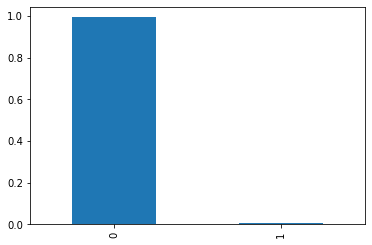

In [6]:
df['TARGET'].value_counts(normalize=True).plot(kind='bar')


# The target column has 4 labels

In [7]:
df.TARGET.unique()

array([0, 1], dtype=int64)

#### In order to feed the data to any machine learning method, it's convenient to change strings to numeric values. So, we are going to changethese 4 target labels to values from 0 to 3

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.isnull().sum()

TARGET                          0
J_F1_LON_RK_3M_CNT_RE           0
J_F1_OTHER_LON_6M_AVBL_AM_RE    0
J_F1_OTHER_LON_MAX_3M_AM_RE     0
J_SHINBO_GIBO_AM_RE             0
J_TOT_LON_CNT_RE                0
J_TOT_LON_AGG_AM_RE             0
J_TOT_LON_MAX_AM_RE             0
J_DPS_CT_BAL_AM_RE              0
J_TOT_DPS_1M_AVBL_AM_RE         0
J_TOT_DPS_6M_AVBL_AM_RE         0
dtype: int64

In [10]:
df.shape

(3716, 11)

In [11]:
df.columns

Index(['TARGET', 'J_F1_LON_RK_3M_CNT_RE', 'J_F1_OTHER_LON_6M_AVBL_AM_RE',
       'J_F1_OTHER_LON_MAX_3M_AM_RE', 'J_SHINBO_GIBO_AM_RE',
       'J_TOT_LON_CNT_RE', 'J_TOT_LON_AGG_AM_RE', 'J_TOT_LON_MAX_AM_RE',
       'J_DPS_CT_BAL_AM_RE', 'J_TOT_DPS_1M_AVBL_AM_RE',
       'J_TOT_DPS_6M_AVBL_AM_RE'],
      dtype='object')

# Create helper functions

In [12]:
## evaluate function generates the classification report of the loaded model based on the list of x and y values

def evaluate(x, y, threshold):
    x = np.array(x)
    y = np.ravel(y)
    pred = (loaded_model.predict_proba(x)[:,1] >= threshold).astype(bool)
    print(pd.crosstab(y, pred, rownames=['Actual'], colnames=['Predicted']))
    print(classification_report(y, pred,digits=4))
    return None;

## generate_curves function creates ROC-AUC and PR-AUC curve of the loaded model and compare that wth the random classifier

def generate_curves(filename_new, X_test, y_test):   

    f = plt.figure(figsize=(10,4))
    ax1 = f.add_subplot(121)
#     loaded_model_old = pickle.load(open(filename_old, 'rb'))
    loaded_model_new = pickle.load(open(filename_new, 'rb'))

#     test_prob_old = loaded_model_old.predict_proba(X_test)[:, 1]
    test_prob_new = loaded_model_new.predict_proba(X_test)[:, 1]
    
#     fpr_old, tpr_old, _ = roc_curve(y_test,  test_prob_old)
#     roc_auc_old = roc_auc_score(y_test,  test_prob_old)
    ax1.plot([0, 1], [0, 1], linestyle='--',label ='random, auc = %.4f'% 0.5, c = 'blue')
#     ax1.plot(fpr_old, tpr_old ,label ='SMOTE-NC, auc = %.4f'% roc_auc_old, c= 'green')
    
    fpr_new, tpr_new, _ = roc_curve(y_test,  test_prob_new)
    roc_auc_new = roc_auc_score(y_test,  test_prob_new)
    ax1.plot(fpr_new, tpr_new ,label ='SMOTE-ENC, auc = %.4f'% roc_auc_new, c= 'red')
    
    ax1.legend(loc=4)

    ax1.set_title('ROC curve' ,fontsize=16)
    ax1.set_ylabel('True Positive Rate',fontsize=14)
    ax1.set_xlabel('False Positive Rate',fontsize=14)

    ax2 = f.add_subplot(122)
    

#     precision_old, recall_old, _ = precision_recall_curve(y_test, test_prob_old)
    precision_new, recall_new, _ = precision_recall_curve(y_test, test_prob_new)
    
#     auc_score_old = auc(recall_old, precision_old)
    auc_score_new = auc(recall_new, precision_new)
    
    random_auc = y_test.sum()/len(y_test)
    
    ax2.plot([0, 1], [random_auc, random_auc], linestyle='--', label ='random, auc = %.4f'% random_auc, c ='blue')
#     ax2.plot(recall_old, precision_old, label = 'SMOTE-NC, auc=%.4f'% auc_score_old, c = 'green')
    ax2.plot(recall_new, precision_new, label = 'SMOTE-ENC, auc=%.4f'% auc_score_new, c = 'red')
    
    ax2.set_title('Precision Recall curve' ,fontsize=16)
    ax2.set_ylabel('Precision', fontsize=14)
    ax2.set_xlabel('Recall',fontsize=14)
    ax2.legend(loc='best')
    plt.show()
    f.savefig(REPORTS / 'bank2_roc_prc.jpeg', bbox_inches='tight')
    
    return None;

In [13]:
## Split the data to be 5-fold cross-validated
kfold = StratifiedKFold(n_splits=5, random_state=42, shuffle=False)

#randomforest model - hyperparameter tuning using grid search
param_grid = {
'max_depth': [2, 3, 4], 'max_features': [2, 3, 4],
'min_samples_leaf': [2, 3], 'min_samples_split': [3, 4], 'n_estimators': [500]
}# Create a base model
param_grid = {'randomforestclassifier__' + key: param_grid[key] for key in param_grid}

In [14]:
Counter(df.TARGET)

Counter({0: 3457, 1: 259})

In [15]:
## Check target label's distribution in the dataset - Class 0 is the majority class
## and there are very few observations for class 2 and 3.
## That's why we are gong to choose class 1 as the minority class for this study

In [16]:
df = df.loc[df['TARGET'].isin([1,0])]

In [17]:
df_feature= df.drop('TARGET',1)
df_target= df[['TARGET']]

In [18]:
# Label encode categorical variables

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self 

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [19]:
encoded_df = MultiColumnLabelEncoder(columns = ['J_F1_LON_RK_3M_CNT_RE', 'J_F1_OTHER_LON_6M_AVBL_AM_RE',
       'J_F1_OTHER_LON_MAX_3M_AM_RE', 'J_SHINBO_GIBO_AM_RE',
       'J_TOT_LON_CNT_RE', 'J_TOT_LON_AGG_AM_RE']).fit_transform(df_feature)



In [21]:
# Split the raw data into train and test set. Split ratio = 75:25

X_train, X_test, y_train, y_test = train_test_split(encoded_df, df_target, test_size=0.25, random_state=12)

In [22]:
for cols in encoded_df:
    print(cols, encoded_df[cols].unique())

J_F1_LON_RK_3M_CNT_RE [1 0 2]
J_F1_OTHER_LON_6M_AVBL_AM_RE [2 1 0]
J_F1_OTHER_LON_MAX_3M_AM_RE [3 2 1 0]
J_SHINBO_GIBO_AM_RE [0 1]
J_TOT_LON_CNT_RE [1 0 3 2]
J_TOT_LON_AGG_AM_RE [2 0 3 1]
J_TOT_LON_MAX_AM_RE [3 1 4 2]
J_DPS_CT_BAL_AM_RE [1 3 2]
J_TOT_DPS_1M_AVBL_AM_RE [1 3 2]
J_TOT_DPS_6M_AVBL_AM_RE [1 3 2]


In [23]:
Counter(df_target.TARGET)

Counter({0: 3457, 1: 259})

In [24]:
col_list = list(X_train.columns)
X_train.index = pd.RangeIndex(len(X_train.index))
y_train.index = pd.RangeIndex(len(y_train.index))
X_test.index = pd.RangeIndex(len(X_test.index))
y_test.index = pd.RangeIndex(len(y_test.index))

In [26]:
## Apply standard scaler on the features , so that euclidean distance calculation in SMOTE is not biased

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
X_train = pd.DataFrame(X_train, index=range(X_train.shape[0]),
                          columns=col_list)
X_test = pd.DataFrame(X_test, index=range(X_test.shape[0]),
                          columns=col_list)

In [28]:
X_train.shape[1]

10

In [29]:
y_train.shape[1]

1

In [30]:
# Our New Proposed SMOTE Method

class MySMOTENC():
    
    def __init__(self, categorical_features):
        self.categorical_features = categorical_features
        
    def chk_neighbors(self, nn_object, additional_neighbor):
        if isinstance(nn_object, Integral):
            return NearestNeighbors(n_neighbors=nn_object + additional_neighbor)
        elif isinstance(nn_object, KNeighborsMixin):
            return clone(nn_object)
        else:
            raise_isinstance_error(nn_name, [int, KNeighborsMixin], nn_object)     
    
    def generate_samples(self, X, nn_data, nn_num, rows, cols, steps, continuous_features_,):
        rng = check_random_state(42)

        diffs = nn_data[nn_num[rows, cols]] - X[rows]
        if sparse.issparse(X):
            sparse_func = type(X).__name__
            steps = getattr(sparse, sparse_func)(steps)
            X_new = X[rows] + steps.multiply(diffs)
        else:
            X_new = X[rows] + steps * diffs 

        X_new = (X_new.tolil() if sparse.issparse(X_new) else X_new)
        # convert to dense array since scipy.sparse doesn't handle 3D
        nn_data = (nn_data.toarray() if sparse.issparse(nn_data) else nn_data)
        all_neighbors = nn_data[nn_num[rows]]
        for idx in range(continuous_features_.size, X.shape[1]):
            mode = stats.mode(all_neighbors[:, :, idx], axis = 1)[0]
            X_new[:, idx] = np.ravel(mode)

        return X_new
    
    def make_samples(self, X, y_dtype, y_type, nn_data, nn_num, n_samples, continuous_features_, step_size=1.0):
        random_state = check_random_state(42)
        samples_indices = random_state.randint(low=0, high=len(nn_num.flatten()), size=n_samples)    
        steps = step_size * random_state.uniform(size=n_samples)[:, np.newaxis]
        rows = np.floor_divide(samples_indices, nn_num.shape[1])
        cols = np.mod(samples_indices, nn_num.shape[1])

        X_new = self.generate_samples(X, nn_data, nn_num, rows, cols, steps, continuous_features_)
        y_new = np.full(n_samples, fill_value=y_type, dtype=y_dtype)
        
        return X_new, y_new
    
    def cat_corr_pandas(self, X, target_df, target_column, target_value):
    # X has categorical columns
        categorical_columns = list(X.columns)
        X = pd.concat([X, target_df], axis=1)

        # filter X for target value
        is_target = X.loc[:, target_column] == target_value
        X_filtered = X.loc[is_target, :]

        X_filtered.drop(target_column, axis=1, inplace=True)

        # get columns in X
        nrows = len(X)
        encoded_dict_list = []
        nan_dict = dict({})
        c = 0
        imb_ratio = len(X_filtered)/len(X)
        OE_dict = {}
        
        for column in categorical_columns:
            for level in list(X.loc[:, column].unique()):
                
                # filter rows where level is present
                row_level_filter = X.loc[:, column] == level
                rows_in_level = len(X.loc[row_level_filter, :])
                
                # number of rows in level where target is 1
                O = len(X.loc[is_target & row_level_filter, :])
                E = rows_in_level * imb_ratio
                # Encoded value = chi, i.e. (observed - expected)/expected
                ENC = (O - E) / E
                OE_dict[level] = ENC
                
            encoded_dict_list.append(OE_dict)

            X.loc[:, column] = X[column].map(OE_dict)
            nan_idx_array = np.ravel(np.argwhere(np.isnan(X.loc[:, column])))
            if len(nan_idx_array) > 0 :
                nan_dict[c] = nan_idx_array
            c = c + 1
            X.loc[:, column].fillna(-1, inplace = True)
                
        X.drop(target_column, axis=1, inplace=True)

        return X, encoded_dict_list, nan_dict

    def fit_resample(self, X, y):
        X_cat_encoded, encoded_dict_list, nan_dict = self.cat_corr_pandas(X.iloc[:,np.asarray(self.categorical_features)], y, target_column='TARGET', target_value=1)
        X_cat_encoded = np.array(X_cat_encoded)
        y = np.ravel(y)
        X = np.array(X)

        unique, counts = np.unique(y, return_counts=True)
        target_stats = dict(zip(unique, counts))
        n_sample_majority = max(target_stats.values())
        class_majority = max(target_stats, key=target_stats.get)
        sampling_strategy = {key: n_sample_majority - value for (key, value) in target_stats.items() if key != class_majority}

        n_features_ = X.shape[1]
        categorical_features = np.asarray(self.categorical_features)
        if categorical_features.dtype.name == 'bool':
            categorical_features_ = np.flatnonzero(categorical_features)
        else:
            if any([cat not in np.arange(n_features_) for cat in categorical_features]):
                raise ValueError('Some of the categorical indices are out of range. Indices'
                            ' should be between 0 and {}'.format(n_features_))
            categorical_features_ = categorical_features

#         continuous_features_ = np.setdiff1d(np.arange(n_features_),categorical_features_)

        target_stats = Counter(y)
        class_minority = min(target_stats, key=target_stats.get)

#         X_continuous = X[:, continuous_features_]
        
#         X_continuous = check_array(X_continuous, accept_sparse=['csr', 'csc'])
#         X_minority = safe_indexing(X_continuous, np.flatnonzero(y == class_minority))

#         if sparse.issparse(X):
#             if X.format == 'csr':
#                 _, var = sparsefuncs_fast.csr_mean_variance_axis0(X_minority)
#             else:
#                 _, var = sparsefuncs_fast.csc_mean_variance_axis0(X_minority)
#         else:
#             var = X_minority.var(axis=0)
#         median_std_ = np.median(np.sqrt(var))
        median_std_ = 1

        X_categorical = X[:, categorical_features_]
#         X_copy = np.hstack((X_continuous, X_categorical))
        X_copy = X_categorical.copy()
        X_cat_encoded = X_cat_encoded * median_std_
#         X_encoded = np.hstack((X_continuous, X_cat_encoded))
        X_encoded = X_cat_encoded
        X_resampled = X_encoded.copy()
        y_resampled = y.copy()


        for class_sample, n_samples in sampling_strategy.items():
            if n_samples == 0:
                continue
            target_class_indices = np.flatnonzero(y == class_sample)
            X_class = safe_indexing(X_encoded, target_class_indices)
            nn_k_ = self.chk_neighbors(5, 1)
            nn_k_.fit(X_class)

            nns = nn_k_.kneighbors(X_class, return_distance=False)[:, 1:]

#             X_new, y_new = self.make_samples(X_class, y.dtype, class_sample, X_class, nns, n_samples, continuous_features_, 1.0)
#             if sparse.issparse(X_new):
#                 X_resampled = sparse.vstack([X_resampled, X_new])
#                 sparse_func = 'tocsc' if X.format == 'csc' else 'tocsr'
#                 X_resampled = getattr(X_resampled, sparse_func)()
#             else:
#                 X_resampled = np.vstack((X_resampled, X_new))
#             y_resampled = np.hstack((y_resampled, y_new))
            
        X_resampled_copy = X_resampled.copy()
        i = 0
#         for col in range(continuous_features_.size, X.shape[1]):
        for col in range(X.shape[1]):
            encoded_dict = encoded_dict_list[i]
            i = i + 1
            for key, value in encoded_dict.items():
                X_resampled_copy[:, col] = np.where(np.round(X_resampled_copy[:, col], 4) == np.round(value * median_std_, 4), key, X_resampled_copy[:, col])

        for key, value in nan_dict.items():
            for item in value:
#                 X_resampled_copy[item, continuous_features_.size + key] = X_copy[item, continuous_features_.size + key]
                X_resampled_copy[item, key] = X_copy[item, key]

               
        X_resampled = X_resampled_copy   
#         indices_reordered = np.argsort(np.hstack((continuous_features_, categorical_features_)))
        indices_reordered = np.argsort(categorical_features_)
        if sparse.issparse(X_resampled):
            col_indices = X_resampled.indices.copy()
            for idx, col_idx in enumerate(indices_reordered):
                mask = X_resampled.indices == col_idx
                col_indices[mask] = idx
            X_resampled.indices = col_indices
        else:
            X_resampled = X_resampled[:, indices_reordered]
        return X_resampled, y_resampled

In [32]:
## Apply the random-forest classifier along with the NEW SMOTE method

filename = (MODELS / 'car_mysmotenc.sav')
samp_pipeline = make_pipeline(MySMOTENC(categorical_features = list(range(0,X_train.shape[1]))), 
                              RandomForestClassifier(random_state=42))
# check model performance on different values of hyper-parameters.
grid_search = GridSearchCV(samp_pipeline, param_grid=param_grid, cv=kfold, scoring='balanced_accuracy',
                        return_train_score=True, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
best_grid = grid_search.best_estimator_
pickle.dump(best_grid, open(filename, 'wb'))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   17.5s finished


In [33]:
## Evaluate SMOTE-ENC performance on train and test set

filename = (MODELS / 'car_mysmotenc.sav')
loaded_model = pickle.load(open(filename, 'rb'))
threshold = 0.5
print('                RF performance Report')
evaluate(X_train, y_train, threshold)
evaluate(X_test, y_test, threshold)
loaded_model.steps[1][1].feature_importances_

                RF performance Report
Predicted  False
Actual          
0           2590
1            197
              precision    recall  f1-score   support

           0     0.9293    1.0000    0.9634      2590
           1     0.0000    0.0000    0.0000       197

   micro avg     0.9293    0.9293    0.9293      2787
   macro avg     0.4647    0.5000    0.4817      2787
weighted avg     0.8636    0.9293    0.8953      2787

Predicted  False
Actual          
0            867
1             62
              precision    recall  f1-score   support

           0     0.9333    1.0000    0.9655       867
           1     0.0000    0.0000    0.0000        62

   micro avg     0.9333    0.9333    0.9333       929
   macro avg     0.4666    0.5000    0.4827       929
weighted avg     0.8710    0.9333    0.9010       929



array([0.02757502, 0.08713234, 0.10123789, 0.01734321, 0.26444341,
       0.20580984, 0.2012914 , 0.02856229, 0.02527775, 0.04132685])

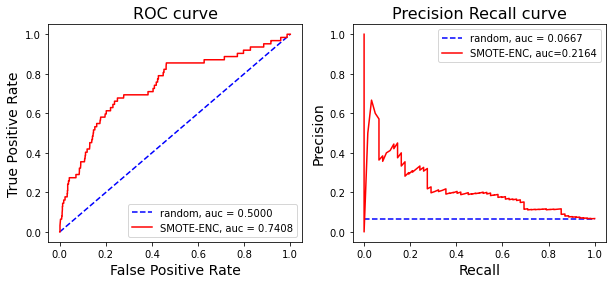

In [34]:
##Create ROC-AUC and PR-AUC curve

generate_curves(MODELS / 'car_mysmotenc.sav', X_test, y_test)

<Figure size 720x720 with 0 Axes>

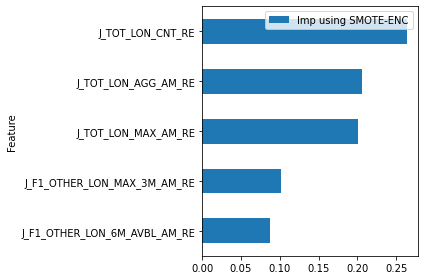

In [35]:
## Find out top 5 most important features using our new SMOTE method

filename = (MODELS / 'car_mysmotenc.sav')
loaded_model = pickle.load(open(filename, 'rb'))
var_imp = (pd.Series(loaded_model.steps[1][1].feature_importances_, index=X_train.columns).nlargest(5))
var_imp_df = var_imp.reset_index()
var_imp_df.columns = ['Feature', 'Imp using SMOTE-ENC']
var_imp_df.set_index('Feature', inplace=True)

plt.figure(figsize=(10, 10))
rcParams.update({'figure.autolayout': True})
var_imp_df.plot(kind='barh').invert_yaxis()
plt.savefig(REPORTS / 'car_newsmote.jpeg', bbox_inches='tight')

enc = MySMOTENC(categorical_features = list(range(0,6)))
X_enc, y_enc = enc.fit_resample(X_train, y_train)

print(y_enc)
np.unique(y_enc, return_counts = True)

def get_eval(y_test,pred=None):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test, pred)
    f1 = f1_score(y_test,pred)
    precision2=precision_score(y_test,pred,pos_label=0)
    recall2=recall_score(y_test,pred,pos_label=0)
    f1_2=f1_score(y_test,pred,pos_label=0)
    print("confusion matrix")
    print(confusion)
    print('accuracy : {0:.4f} , precision : {1:.4f} , recall : {2:.4f}, F1 score : {3:.4f} \n precision(0) : {4:.4f} , recall(0) : {5:.4f}, f1(0) : {6:.4f}'.format(accuracy,precision, recall,f1,precision2,recall2,f1_2))

# 모델형성
RF_reg = RandomForestClassifier()
RF_reg.fit(X_enc, y_enc)
RF_pred = RF_reg.predict(X_test)

# 결과지표
get_eval(y_test, RF_pred)

# evaluate
RF_mse = mean_squared_error(y_test, RF_pred)
RF_rmse = np.sqrt(RF_mse)
print(RF_rmse)